In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from knetworks import knetworks, Network
from sklearn.preprocessing import StandardScaler
import numpy as np
%config InlineBackend.figure_format='retina'

import torch
import torch.nn as nn

device = torch.device("cuda")

In [2]:
centers = 6
samples = 300
X, _ = make_blobs(n_samples=samples, centers=centers, n_features=2, cluster_std=0.9, random_state=2)
scaler = StandardScaler()
X =scaler.fit_transform(X)

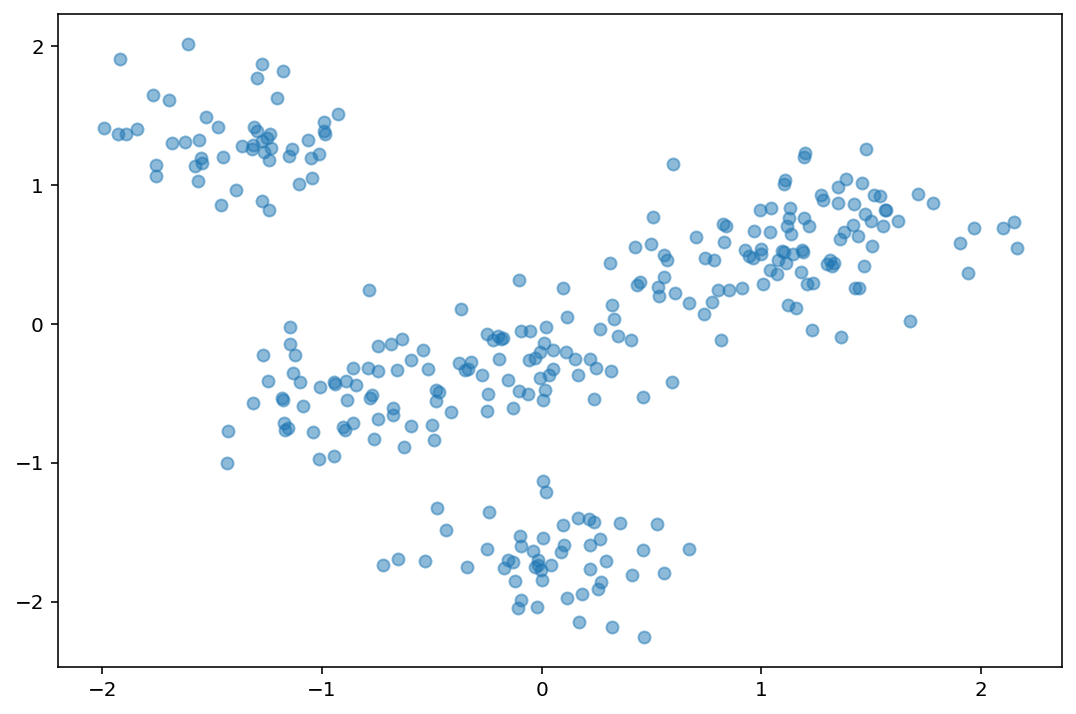

In [3]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:,-1], alpha=0.5)

In [4]:
knet = knetworks(centers,X)

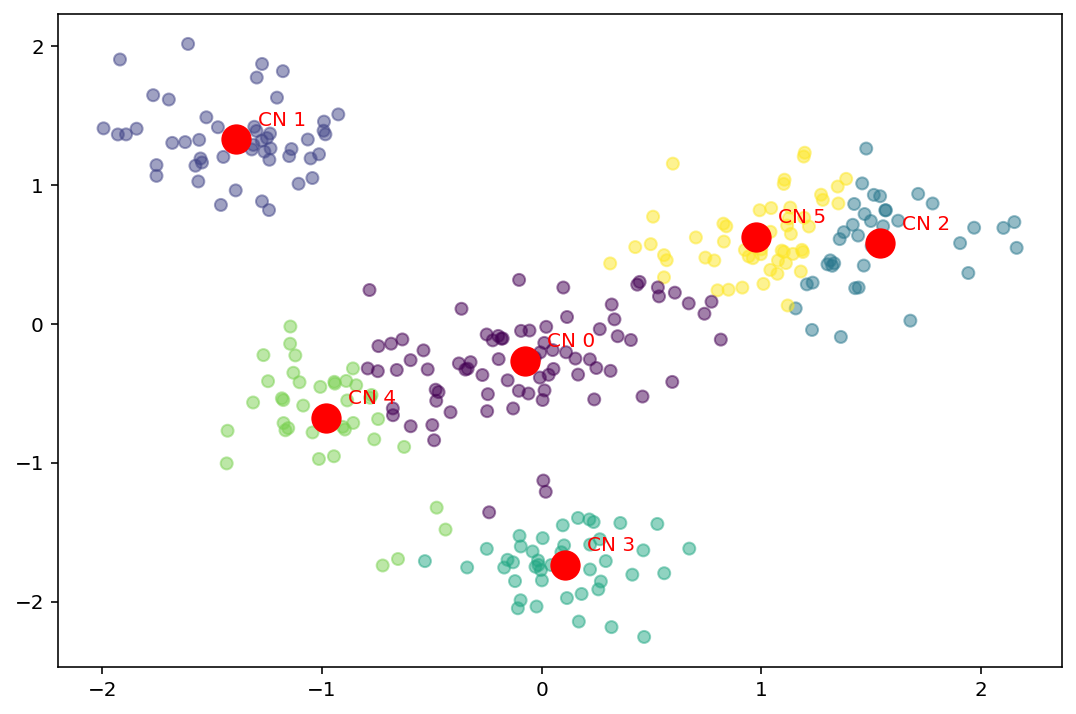

In [5]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:,-1], alpha=0.5, c=knet.km.affiliations)
plt.scatter(knet.centroids[:,0], knet.centroids[:,-1], s=200, c='r')
for k in range(knet.k):
    plt.text(x=knet.centroids[k,0]+0.1, y=knet.centroids[k,-1]+0.1 , s='CN ' + str(k), c='r')

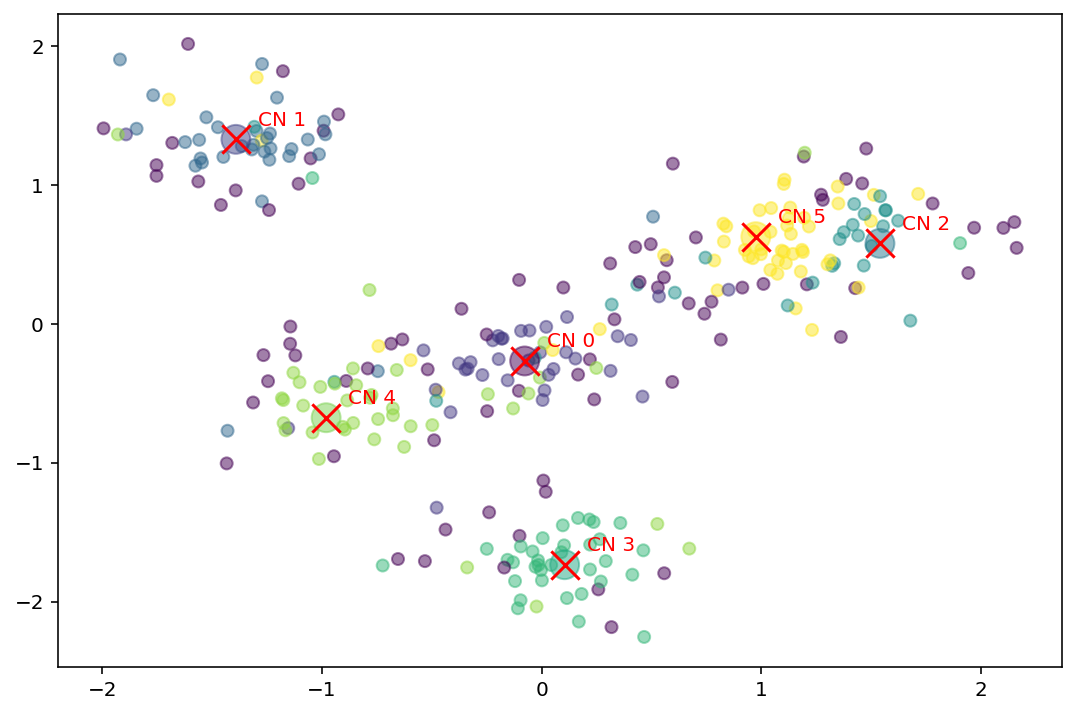

In [6]:
plt.figure(figsize=(9, 6))
colors = np.full((samples,1),0)
p = []

for k in range(knet.k):
    p = np.array([knet.sampleRandom(k) for i in range(100)]) # get Random Training Sample for centroid 0
    colors[p] = k+1

plt.scatter(X[:,0], X[:,-1], c=colors, alpha=0.5)

plt.scatter(knet.centroids[:,0], knet.centroids[:,-1], s=209, c=[i+1 for i in range(knet.k)] , alpha=0.5)
plt.scatter(knet.centroids[:,0], knet.centroids[:,-1], s=200, c='r', marker="x")

for k in range(knet.k):
    plt.text(x=knet.centroids[k,0]+0.1, y=knet.centroids[k,-1]+0.1 , s='CN ' + str(k), c='r')

In [7]:
import random
tdata = []
for i in range(14):
    data = []
    for j in range(20):
        data.append(random.randint(0,1))
    tdata.append(data)
tdata = tdata + tdata

In [8]:
tdata = np.array(tdata)

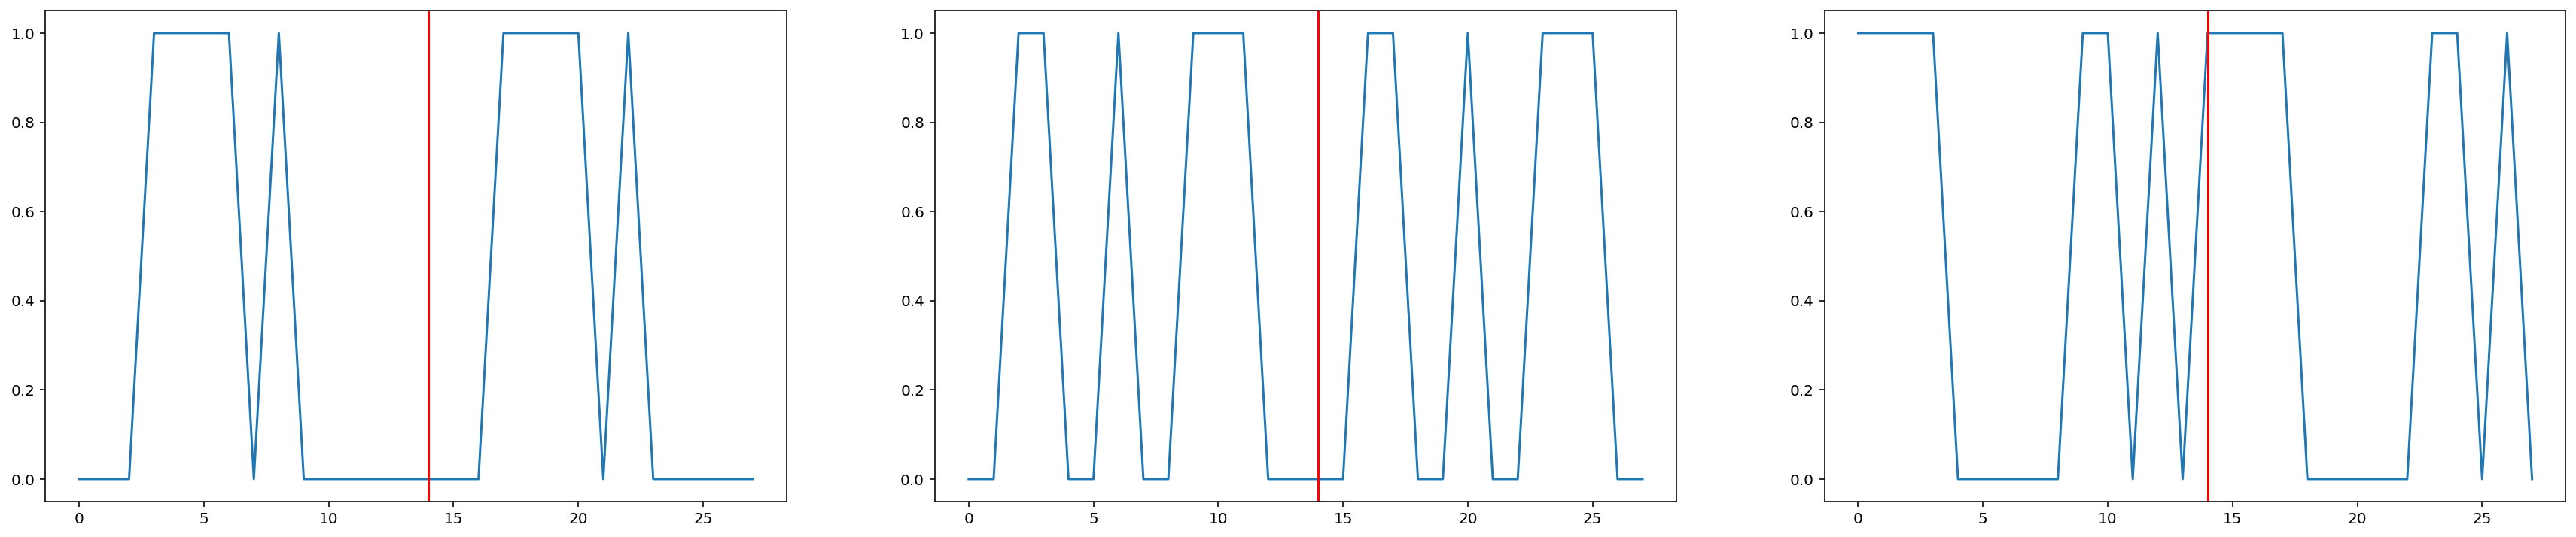

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 6))
ax1.plot(tdata[:,0])
ax1.axvline(x=14, ymin=0, ymax=1, c='r')
ax2.plot(tdata[:,1])
ax2.axvline(x=14, ymin=0, ymax=1, c='r')
ax3.plot(tdata[:,2])
ax3.axvline(x=14, ymin=0, ymax=1, c='r')

In [10]:
net = Network(20, device=device)

In [11]:
net.train(tdata, verbose=True)

epoch:   1 loss: 0.25554273
epoch:  26 loss: 0.00422940
epoch:  51 loss: 0.00200506
epoch:  76 loss: 0.00687093
epoch: 101 loss: 0.00173264
epoch: 126 loss: 0.00176489
epoch: 151 loss: 0.00211699
epoch: 176 loss: 0.00151970
epoch: 201 loss: 0.00328216
epoch: 226 loss: 0.00218235
epoch: 251 loss: 0.00279054
epoch: 276 loss: 0.00278543
epoch: 301 loss: 0.00411326
epoch: 326 loss: 0.00281268
epoch: 351 loss: 0.00417052
epoch: 376 loss: 0.00106993
epoch: 401 loss: 0.00617205
epoch: 426 loss: 0.00131343
epoch: 451 loss: 0.00203592
epoch: 476 loss: 0.00440949
epoch: 499 loss: 0.0045635030


In [12]:
predict = np.round(net.predict(tdata, future=28))

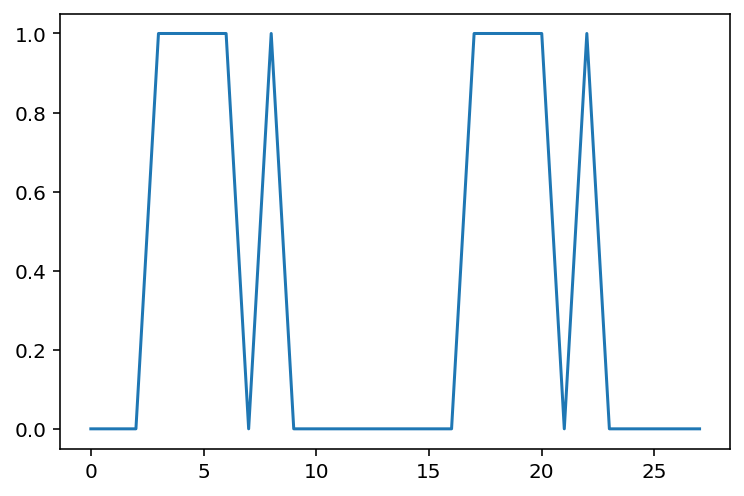

In [13]:
plt.plot(predict[:,0])